# Lista 5

### Exercicio 1

In [25]:
# Imports
import sys

from scipy.optimize import minimize

sys.path.append(f'../FinanceHub')

from calendars import DayCounts
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [26]:
starting_date = '2021-01-29'

def calc_du(reference_date, expiry_date):
    t = pd.to_datetime(reference_date)
    dc = DayCounts('BUS/252', calendar='anbima')
    T = pd.to_datetime(expiry_date)
    return dc.days(t, T)


def interpolate_rate(r1, r2, t1, t2, t, percent=True):
    if percent:
        r1 = r1 / 100
        r2 = r2 / 100
    ir1 = t1 * math.log(1 + r1)
    ir2 = t2 * math.log(1 + r2)
    r = ir1 + (ir2 - ir1) * (t - t1) / (t2 - t1)
    r = math.exp(r / t) - 1
    if percent:
        r = r * 100
    return r


In [27]:
# Closing as of 12/03/2021
DI_du = [
    3, 5, 6, 7, 11, 14, 18, 19, 20, 24, 31, 33, 34, 38, 48, 49, 52, 60, 66, 70, 77, 80, 81,
    90, 91, 95, 96, 97, 98, 109, 110, 111, 122, 125, 132, 139, 140, 143, 150, 157, 159,
    171, 172, 173, 180, 182, 187, 189, 194, 202, 203, 210, 215, 217, 230, 231, 234, 241,
    249, 263, 264, 270, 278, 280, 284, 292, 293, 297
]
# In percentage
DI_rates = [
    1.9, 2.21, 2.25, 2.27, 2.3, 2.32, 2.32, 2.33, 2.33, 2.34, 2.38, 2.39, 2.4, 2.41, 2.43,
    2.43, 2.43, 2.55, 2.61, 2.66, 2.71, 2.72, 2.73, 2.81, 2.82, 2.84, 2.85, 2.86, 2.87, 2.93,
    2.93, 2.94, 3.03, 3.06, 3.11, 3.15, 3.16, 3.17, 3.24, 3.3, 3.32, 3.4, 3.41, 3.42, 3.47,
    3.49, 3.52, 3.54, 3.57, 3.62, 3.63, 3.67, 3.69, 3.71, 3.79, 3.8, 3.8, 3.84, 3.88, 3.96, 3.97,
    4.01, 4.08, 4.1, 4.12, 4.18, 4.19, 4.21
]

In [28]:
di_curve = pd.read_csv(f'../FinanceHub/finmath/brazilian_bonds/di1_curve_210129.csv')
di_curve["du"] = calc_du(starting_date, di_curve["Unnamed: 0"])


def interpolate(du, rates, percent):
    assert(len(du) == len(rates))
    inter_du = []
    inter_rates = []

    for x in range(len(du)-1):
        inter_du.append(du[x])
        inter_rates.append(rates[x])

        for t in range(du[x]+1, du[x+1]):
            inter_du.append(t)
            inter_rates.append(interpolate_rate(rates[x], rates[x+1], du[x], du[x+1], t, percent))

    inter_du.append(du[len(du)-1])
    inter_rates.append(rates[len(rates)-1])
    return inter_du, inter_rates

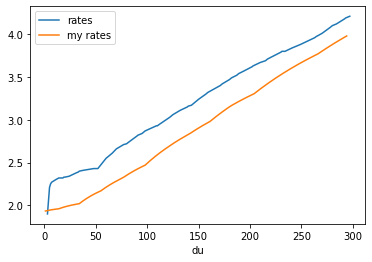

In [29]:
du_offset = calc_du(starting_date, "2021-03-12")

DI_closing = pd.DataFrame()
DI_closing["du"] = DI_du
DI_closing["rates"] = DI_rates
DI_closing["rates"] = DI_closing["rates"]

my_du, my_rates = interpolate(di_curve["du"], di_curve["last_price"], True)
my_df = pd.DataFrame()
my_df["du"] = my_du[du_offset:DI_du[-1]-3 + du_offset] - du_offset
my_df["my rates"] = my_rates[du_offset:DI_du[-1]-3 + du_offset]


di_plot = DI_closing.plot(x="du", y="rates")
my_plot = my_df.plot(x="du", y="my rates", ax=di_plot)
plt.show()


### Exercicio 3

Olhando a curva acima, podemos ver que a curva se torna achatada, então é possível fazer um flattner vendendo a taxa de curto prazo e comprando a taxa de longo prazo.